In [1]:
# Importing essentials libraries

from keras.layers import *
from keras.models import Sequential, Model
from keras import optimizers
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras import callbacks

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report

import numpy as np
import pandas as pd
import os

Using TensorFlow backend.


In [2]:
# Loading MNIST Dataset
# Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

# uint8 array of grayscale image data with shape (60000, 785).
#1 column for the label and rest 784 = 28 x28 
train = pd.read_csv('../Dataset/MNIST/mnist_train.csv')

# uint8 array of grayscale image data with shape (10000, 785).
#1 column for the label and rest 784 = 28 x28 
test = pd.read_csv('../Dataset/MNIST/mnist_test.csv')

In [3]:
# Creating Training data
x = train.drop(['label'],1).values
y = train['label'].values

In [4]:
# Creating Test data
x_test = test.drop(['label'],1).values
y_test = test['label'].values

In [5]:
# Normalizing Data
x = x/255.0
x_test = x_test/255.0

In [6]:
# Reshaping data in 3 dimension image (grayscale) for CNN (28,28,1) to understand

x = x.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [7]:
# Encodeing labels to one hot vector
# ex : 2 => [0,0,1,0,0,0,0,0,0,0]
y = to_categorical(y)
y_test = to_categorical(y_test)

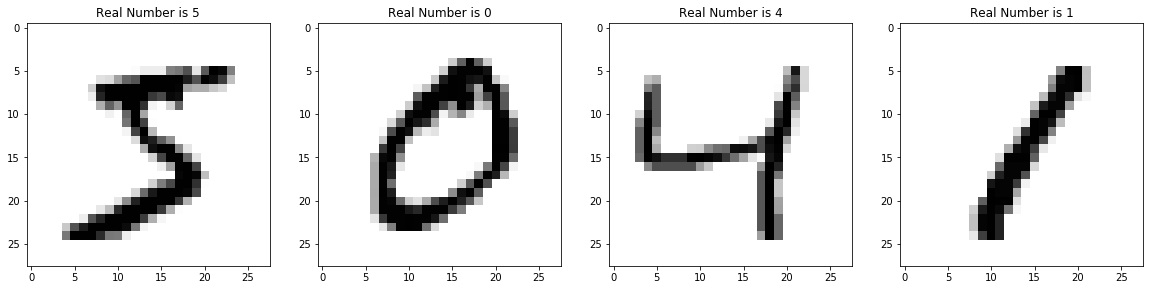

In [8]:
# Training data verification

fig , axis = plt.subplots(1,4,figsize = (20,10))

for i, ax in enumerate(axis.flat):
    ax.imshow(x[i].reshape(28,28),cmap="binary")
    digit = y[i].argmax()
    ax.set(title = f"Real Number is {digit}")

In [9]:
# Defining epochs and batch_size
epochs = 1000
batch_size = 64

In [10]:
#Intializing the Model

model = Sequential()

#Adding Convolution Layer 
model.add(Conv2D(4,(3,3),activation='relu',padding='valid',input_shape=(28,28,1)))
model.add(Conv2D(4,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(Conv2D(5,kernel_size=(3,3),activation='relu',padding='valid'))

#Pooling Features
model.add(AveragePooling2D((3,3),strides=(2,2),padding='valid'))

#Flatting of Images
model.add(Flatten())

#Dense Layer
model.add(Dense(15,activation='relu'))

#Output Layer
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

#Compiling Model
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
# Model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 4)         148       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 5)         185       
_________________________________________________________________
average_pooling2d_1 (Average (None, 10, 10, 5)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                7515      
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)               

In [12]:
# Declaring Callbacks

reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss',
                                       factor=0.1,
                                       patience=5,
                                       min_lr=0.0000000002,
                                       verbose=1)

early = callbacks.EarlyStopping(monitor='val_accuracy',
                               min_delta=0.00001,
                               patience=50,
                               verbose=1,
                               restore_best_weights = True,
                               mode='max')

In [13]:
# Training of model

history = model.fit(x, y, batch_size=batch_size, epochs=epochs, validation_split=0.05, callbacks=[reduce_lr,early], shuffle=True)

Train on 57000 samples, validate on 3000 samples
Epoch 1/1000
57000/57000 [==============================] - 19s 329us/step - loss: 0.4079 - accuracy: 0.8729 - val_loss: 0.0983 - val_accuracy: 0.9753
Epoch 2/1000
57000/57000 [==============================] - 20s 343us/step - loss: 0.1768 - accuracy: 0.9458 - val_loss: 0.0805 - val_accuracy: 0.9787
Epoch 3/1000
57000/57000 [==============================] - 20s 353us/step - loss: 0.1484 - accuracy: 0.9542 - val_loss: 0.0754 - val_accuracy: 0.9840
Epoch 4/1000
57000/57000 [==============================] - 22s 379us/step - loss: 0.1320 - accuracy: 0.9588 - val_loss: 0.0747 - val_accuracy: 0.9813
Epoch 5/1000
57000/57000 [==============================] - 23s 398us/step - loss: 0.1250 - accuracy: 0.9613 - val_loss: 0.0704 - val_accuracy: 0.9830
Epoch 6/1000
57000/57000 [==============================] - 24s 415us/step - loss: 0.1148 - accuracy: 0.9646 - val_loss: 0.0647 - val_accuracy: 0.9817
Epoch 7/1000
57000/57000 [===================

57000/57000 [==============================] - 24s 428us/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 0.0552 - val_accuracy: 0.9897
Epoch 54/1000
57000/57000 [==============================] - 24s 430us/step - loss: 0.0423 - accuracy: 0.9862 - val_loss: 0.0552 - val_accuracy: 0.9897
Epoch 55/1000
57000/57000 [==============================] - 25s 432us/step - loss: 0.0419 - accuracy: 0.9863 - val_loss: 0.0553 - val_accuracy: 0.9897
Epoch 56/1000
57000/57000 [==============================] - 25s 437us/step - loss: 0.0400 - accuracy: 0.9867 - val_loss: 0.0557 - val_accuracy: 0.9897
Epoch 57/1000
57000/57000 [==============================] - 24s 428us/step - loss: 0.0419 - accuracy: 0.9860 - val_loss: 0.0556 - val_accuracy: 0.9897
Epoch 58/1000
57000/57000 [==============================] - 24s 430us/step - loss: 0.0418 - accuracy: 0.9858 - val_loss: 0.0553 - val_accuracy: 0.9897
Epoch 59/1000
57000/57000 [==============================] - 27s 475us/step - loss: 0.0426 - accuracy:

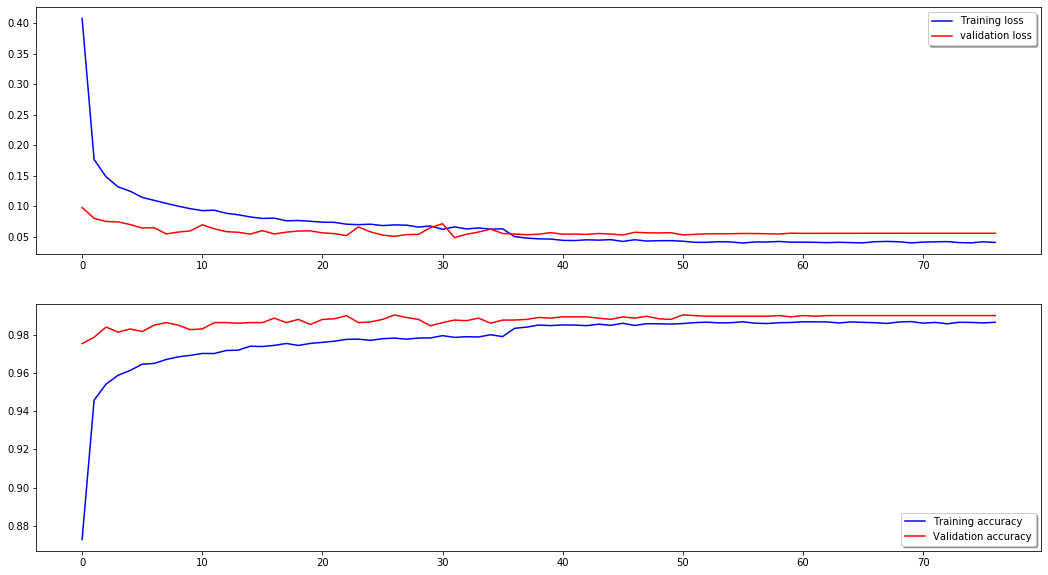

In [15]:
# Plot the loss and accuracy curves for training and validation 

fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

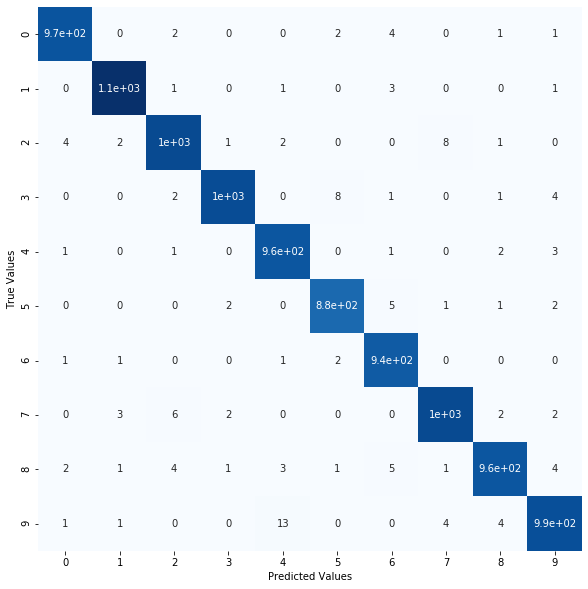

In [16]:
# Set Figure
fig = plt.figure(figsize=(10, 10)) 

# Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_pred = model.predict(x_test) 

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

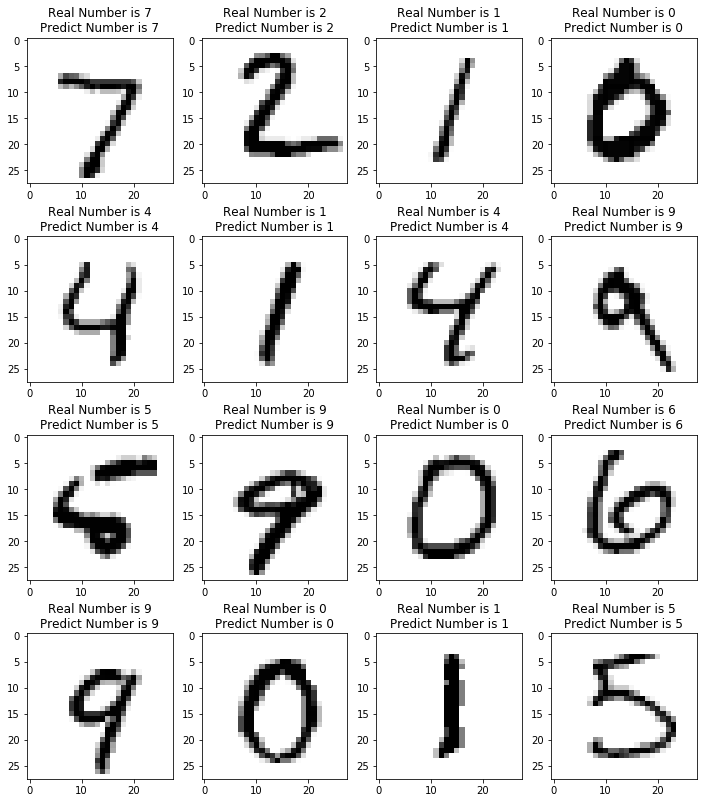

In [20]:
# Visualizing predicted and correct numbers

fig, axis = plt.subplots(4, 4, figsize=(12, 14))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_test[i].reshape(28,28), cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}")

In [23]:
# Max Validation Accuracy
print('Max Validation Accuracy =',max(history.history['val_accuracy'])*100,'%')


Max Validation Accuracy = 99.03333187103271 %


In [24]:
model.save('mnist.h5')